In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Loading the dataset and displaying its first few rows
df = pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [2]:
# Checking for any missing values in the dataset
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Text(0.5, 1.0, 'Correlation Heatmap')

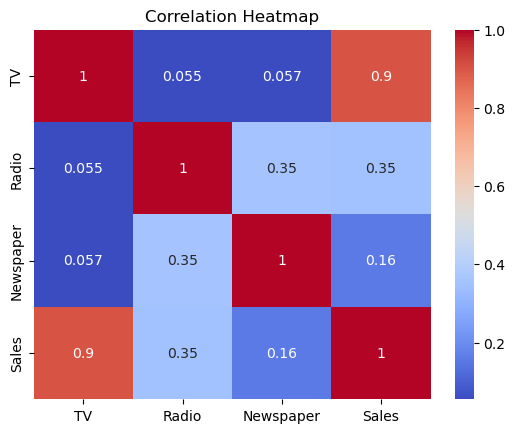

In [3]:
# Displaying the correlation heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

In [4]:
# Splitting the data into features (X) and target variable (y)
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Printing the test labels to examine the true values for evaluation
print(y_test)

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
115    12.6
69     22.3
170     8.4
174    16.5
45     16.1
66     11.0
182     8.7
165    16.9
78      5.3
186    10.3
177    16.7
56      5.5
152    16.6
82     11.3
68     18.9
124    19.7
16     12.5
148    10.9
93     22.2
65     11.3
60      8.1
84     21.7
67     13.4
125    10.6
132     5.7
9      15.6
18     11.3
55     23.7
75      8.7
150    16.1
104    20.7
135    11.6
137    20.8
164    11.9
76      6.9
Name: Sales, dtype: float64


In [5]:
# Printing the predicted values to examine the model's predictions on the test data
print(y_pred)

[17.0347724  20.40974033 23.72398873  9.27278518 21.68271879 12.56940161
 21.08119452  8.69035045 17.23701254 16.66657475  8.92396497  8.4817344
 18.2075123   8.06750728 12.64550975 14.93162809  8.12814594 17.89876565
 11.00880637 20.47832788 20.80631846 12.59883297 10.9051829  22.38854775
  9.41796094  7.92506736 20.83908497 13.81520938 10.77080925  7.92682509
 15.95947357 10.63490851 20.80292008 10.43434164 21.5784752  21.18364487
 12.12821771 22.80953262 12.60992766  6.46441252]


In [6]:
# Evaluating model performance
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
print("Root Mean Squared Error:", rmse)
r2 = r2_score(y_test, y_pred)
print("R-squared (R2 Score):", r2)

Root Mean Squared Error: 1.7052146229349223
R-squared (R2 Score): 0.9059011844150826


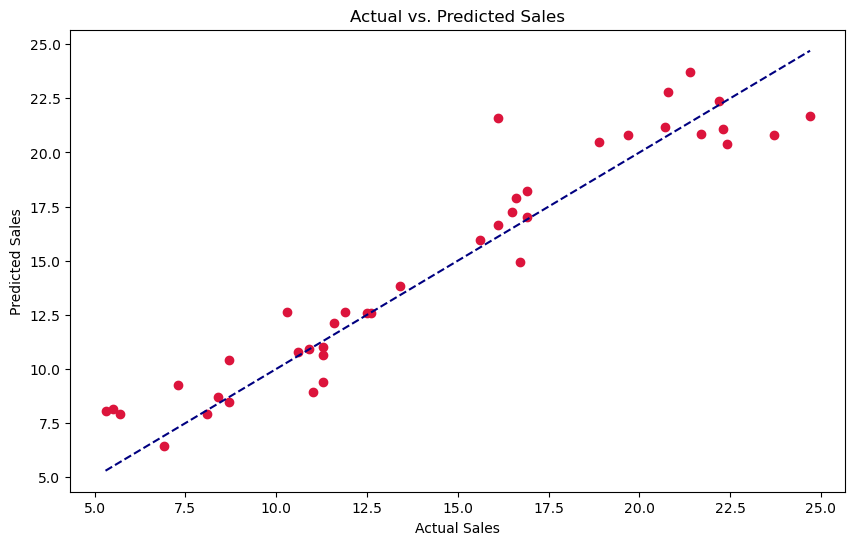

In [7]:
# Visyalization by plotting actual vs. predicted sales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='crimson')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='navy')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.show()